# Example for reading depth data file

In [1]:
import zlib
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import glob
from PIL import Image
import json

In [2]:
image_path = './Open3D-0.10.0/ReconstructionSystem/dataset/iOSLivingRoom/color/'
depth_path = './Open3D-0.10.0/ReconstructionSystem/dataset/iOSLivingRoom/depth/'
data_path = './Open3D-0.10.0/ReconstructionSystem/dataset/iOSLivingRoom/data/'

### Read image and depth

In [3]:
def get_image(root):
    image_list = []
    for filename in sorted(glob.glob(root+'*.png')): #assuming gif
        img = cv.imread(filename, cv.IMREAD_COLOR)
        img = cv.resize(img, (240,320), interpolation = cv.INTER_AREA)
        image_list.append(img)
    return image_list

def get_json(root):
    depth_list = []
    for filename in sorted(glob.glob(root+'*.json')): #assuming gif
        with open(filename) as f:
            data = json.load(f)['data']
            depth = np.array(data)
            depth = depth.reshape(320, -1)
            depth = depth.astype(np.uint16)
            depth_list.append(depth)
    return depth_list

In [4]:
image_list = get_image(image_path)
depth_list = get_json(data_path)
print(len(image_list))
print(len(depth_list))

308
308


(320, 240)


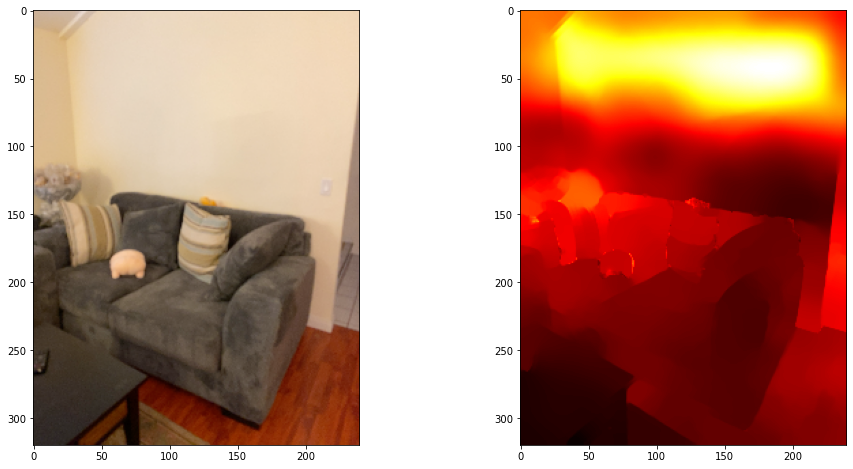

In [5]:
print(depth_list[0].shape)
fig = plt.figure(figsize=(16,8))
f1 = fig.add_subplot(1,2,1)
f1.imshow(cv.cvtColor(image_list[0], cv.COLOR_BGR2RGB))
f2 = fig.add_subplot(1,2,2)
f2.imshow(depth_list[0], cmap='hot')

In [6]:
print(depth_list[0].shape)

(320, 240)


In [7]:
print(depth_list[0][100][20])

2404


In [8]:
for idx in range(len(depth_list)):
    path = depth_path + "depth" + str(idx+1).zfill(4) + ".png"
    cv.imwrite(path, depth_list[idx])